In [1]:
# pip install opencv-python
# !pip install mlxtend
# pip install tqdm
# pip install --upgrade tensorflow
# !pip install imgaug
# !pip install --upgrade numpy
# !pip install --upgrade scikit-image
# !pip install mlxtend

In [2]:
import os
import cv2
import glob
import h5py
import tqdm
import keras
import shutil
import warnings
import random, os
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from pathlib import Path
from tensorflow import lite
from tensorflow import keras
from keras.models import Model
from keras import backend as K
#import matplotlib.pyplot as plt
from keras.models import Sequential
from imblearn.over_sampling import SMOTE
from keras.layers import InputLayer
warnings.filterwarnings('ignore')
from tensorflow.keras import layers
from keras.models import load_model
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import regularizers, optimizers
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import plot_model
from sklearn.metrics import cohen_kappa_score
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import preprocess_input
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
# from keras_preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, Input, Flatten, SeparableConv2D
from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from keras import layers,models
from keras.preprocessing.image import ImageDataGenerator
import imgaug.augmenters as augment
import tensorflow as tf
from os import listdir, makedirs, getcwd, remove
from os.path import isfile, join, abspath, exists, isdir, expanduser
from PIL import Image
from sklearn.metrics import classification_report
from pathlib import Path

from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import StratifiedKFold, KFold

from keras.layers import GlobalMaxPooling2D
from keras.layers import Concatenate
from keras.models import Model
from keras import backend as K
from keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.utils import plot_model
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping,EarlyStopping,TensorBoard,ReduceLROnPlateau,CSVLogger,LearningRateScheduler
from keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
color = sns.color_palette()
import tensorflow 
import keras 
from tensorflow.keras.models import Sequential
%matplotlib inline

from datetime import datetime
from keras.models import Sequential
from keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras import backend as K
from keras import regularizers
from keras.callbacks import Callback
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from matplotlib.pyplot import imshow
from PIL import Image
from sklearn.metrics import roc_auc_score

from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

print(get_available_gpus())


[]


In [3]:
dtrain=pd.read_csv("D:/Data_Science/huzzi/CheXpert-v1.0-small/train.csv")
dtrain = dtrain.fillna(0)
# import valid data info from valid.csv
dnew=pd.read_csv("D:/Data_Science/huzzi/CheXpert-v1.0-small/valid.csv")
dnew = dnew.fillna(0)

#add dnew to dtrain to re-split since valid data in data set is very small
dtrain = dtrain.append(dnew)

#pre-process data: remove Lateral images
dtrain = dtrain[~dtrain[dtrain.columns[3]].str.contains("Lateral")]
#pre-process data: drop selected features - only images as inputs
dtrain = dtrain.drop(['Sex', 'Age', 'Frontal/Lateral', 'AP/PA', 'No Finding','Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices'], axis=1)
print(dtrain.shape)
dtrain.describe().transpose()

(191229, 2)


count      mean       std  min  25%  50%  75%  max
Pneumonia  191229.0 -0.059081  0.323371 -1.0  0.0  0.0  0.0  1.0

In [4]:
# dealing with uncertanty (-1) values
dtrain = dtrain.replace(-1,1)
dtrain.describe().transpose()

count      mean       std  min  25%  50%  75%  max
Pneumonia  191229.0  0.108059  0.310456  0.0  0.0  0.0  0.0  1.0

In [5]:
dtrain.head(5)

Path  Pneumonia
0  CheXpert-v1.0-small/train/patient00001/study1/...        0.0
1  CheXpert-v1.0-small/train/patient00002/study2/...        0.0
2  CheXpert-v1.0-small/train/patient00002/study1/...        0.0
4  CheXpert-v1.0-small/train/patient00003/study1/...        0.0
5  CheXpert-v1.0-small/train/patient00004/study1/...        0.0

In [6]:
### split data into train/valid/test
dtrain = dtrain.sample(frac=1)
dvalid_size = round(0.1*dtrain.shape[0])
dtest_size = dvalid_size
dtr = dtrain[0:dtrain.shape[0]-dvalid_size-dtest_size+1]
dv = dtrain[dtrain.shape[0]-dvalid_size-dtest_size:dtrain.shape[0]-dvalid_size+1]
dte = dtrain[dtrain.shape[0]-dvalid_size:dtrain.shape[0]+1]

In [7]:
print(dtr.shape)
#dtr.describe().transpose()

(152984, 2)


In [8]:
print(dte.shape)
#dtr.describe().transpose()

(19123, 2)


In [9]:
print(dv.shape)
#dtr.describe().transpose()

(19124, 2)


In [10]:
dtr.head(5)

Path  Pneumonia
210548  CheXpert-v1.0-small/train/patient55443/study1/...        0.0
34889   CheXpert-v1.0-small/train/patient08540/study3/...        0.0
42589   CheXpert-v1.0-small/train/patient10428/study1/...        0.0
150304  CheXpert-v1.0-small/train/patient35589/study19...        0.0
8366    CheXpert-v1.0-small/train/patient02074/study8/...        0.0

In [11]:
dtr["Path"] = "D:/Data_Science/huzzi/" + dtr["Path"]
dv["Path"] = "D:/Data_Science/huzzi/" + dv["Path"]
dte["Path"] = "D:/Data_Science/huzzi/" + dte["Path"]

In [12]:
dtr = dtr.iloc[1:3000,:]
dv = dv.iloc[1:3000,:]
dte = dte.iloc[1:3000,:]

In [13]:
### data generation for Keras 
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255.)
valid_datagen=ImageDataGenerator(rescale=1./255.)

target_size = (224,224)
train_generator=train_datagen.flow_from_dataframe(dataframe=dtr, directory=None , x_col="Path", y_col=list(dtr.columns[1:2]), class_mode="other", target_size=target_size, batch_size=32)
valid_generator=valid_datagen.flow_from_dataframe(dataframe=dv, directory=None, x_col="Path", y_col=list(dv.columns[1:2]), class_mode="other", target_size=target_size, batch_size=32)
test_generator=test_datagen.flow_from_dataframe(dataframe=dte, directory=None, x_col="Path", y_col=list(dte.columns[1:2]), class_mode="other", target_size=target_size, batch_size=1)


Found 2999 validated image filenames.
Found 2999 validated image filenames.
Found 2999 validated image filenames.


In [14]:
print(dtr.shape)
dtr.dtypes

(2999, 2)


Path          object
Pneumonia    float64
dtype: object

In [15]:
print(dv.shape)
dv.dtypes

(2999, 2)


Path          object
Pneumonia    float64
dtype: object

In [16]:
print(dte.shape)
dte.dtypes

(2999, 2)


Path          object
Pneumonia    float64
dtype: object

In [17]:
np.unique(dtr['Pneumonia'], return_counts=True), np.unique(dv['Pneumonia'], return_counts=True), np.unique(dte['Pneumonia'], return_counts=True),

((array([0., 1.]), array([2667,  332], dtype=int64)),
 (array([0., 1.]), array([2691,  308], dtype=int64)),
 (array([0., 1.]), array([2671,  328], dtype=int64)))

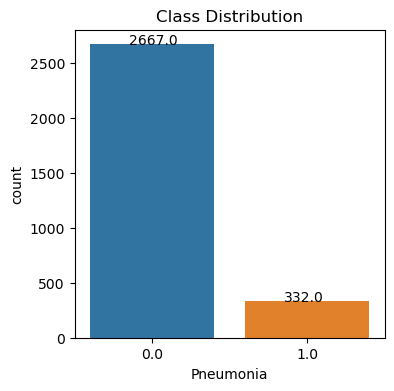

In [18]:
# Checking distribution of classes in train set
plt.figure(figsize=(4,4))
plt.title("Class Distribution")
ax = sns.countplot(x='Pneumonia', data=dtr)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

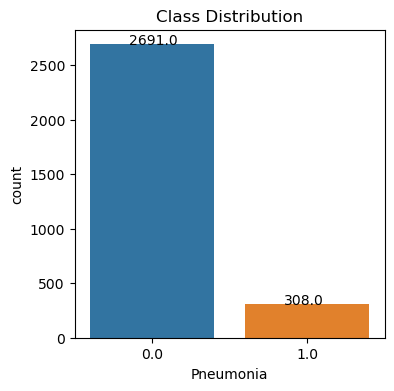

In [19]:
# Checking distribution of classes in validation set
plt.figure(figsize=(4,4))
plt.title("Class Distribution")
ax = sns.countplot(x='Pneumonia',data=dv)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

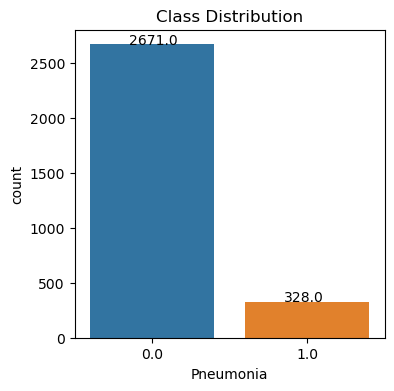

In [20]:
# Checking distribution of classes in test set
plt.figure(figsize=(4,4))
plt.title("Class Distribution")
ax = sns.countplot(x='Pneumonia',data=dte)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

In [21]:
dv = dv.append(dte)

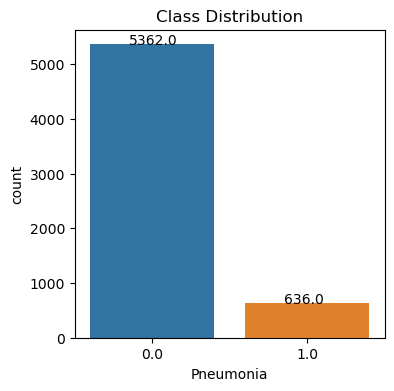

In [22]:
# Checking distribution of classes in validation set
plt.figure(figsize=(4,4))
plt.title("Class Distribution")
ax = sns.countplot(x='Pneumonia',data=dv)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

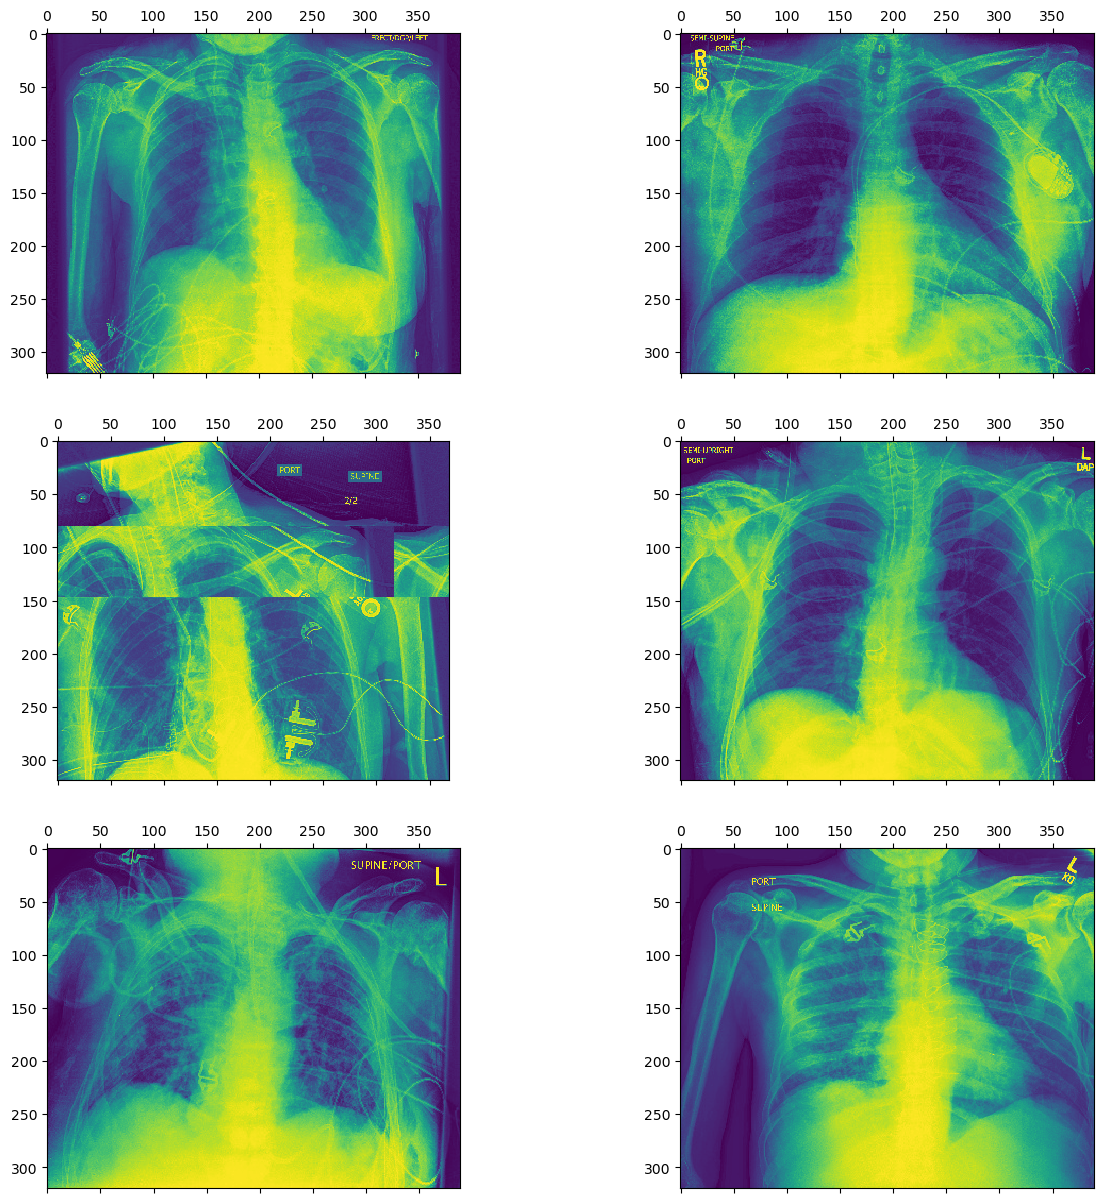

In [23]:
#Pneumonia
plot_image = plt.figure(figsize=(15,15))

plot1 = plot_image.add_subplot(3,2,1)
plot2 = plot_image.add_subplot(3,2,2)
plot3 = plot_image.add_subplot(3,2,3)
plot4 = plot_image.add_subplot(3,2,4)
plot5 = plot_image.add_subplot(3,2,5)
plot6 = plot_image.add_subplot(3,2,6)
plot1.matshow(plt.imread(train_generator.filepaths[37]))
plot2.matshow(plt.imread(train_generator.filepaths[176]))
plot3.matshow(plt.imread(train_generator.filepaths[1553]))
plot4.matshow(plt.imread(train_generator.filepaths[354]))
plot5.matshow(plt.imread(train_generator.filepaths[1979]))
plot6.matshow(plt.imread(train_generator.filepaths[824]))

<h1 style="font-size: 30px;">Customized CNN</h1>

In [24]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(224, 224, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(224, 224, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.2))

cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])


In [25]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 220, 220, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 32)      0         
 D)                                                              
                                                        

In [26]:
r = cnn_model.fit_generator(
                    train_generator, 
                    steps_per_epoch  = 20, 
                    validation_data  = valid_generator,
                    validation_steps = 20,
                    epochs           = 10,  
                    verbose          = 1)

Epoch 1/10


20/20 [==============================] - 55s 3s/step - loss: 3.0985 - accuracy: 0.7984 - val_loss: 3.5650 - val_accuracy: 0.8891
Epoch 2/10
20/20 [==============================] - 48s 2s/step - loss: 0.4006 - accuracy: 0.8938 - val_loss: 0.5444 - val_accuracy: 0.9094
Epoch 3/10
20/20 [==============================] - 49s 2s/step - loss: 0.4265 - accuracy: 0.8828 - val_loss: 0.5079 - val_accuracy: 0.9000
Epoch 4/10
20/20 [==============================] - 49s 2s/step - loss: 0.4192 - accuracy: 0.8843 - val_loss: 0.5293 - val_accuracy: 0.8781
Epoch 5/10
20/20 [==============================] - 49s 2s/step - loss: 0.4716 - accuracy: 0.8780 - val_loss: 0.3263 - val_accuracy: 0.9047
Epoch 6/10
20/20 [==============================] - 49s 2s/step - loss: 0.4192 - accuracy: 0.8781 - val_loss: 0.3671 - val_accuracy: 0.8875
Epoch 7/10
20/20 [==============================] - 48s 2s/step - loss: 0.4209 - accuracy: 0.8828 - val_loss: 0.3949 - val_accuracy: 0.9031
Epoch 8/10
20/20 [

In [27]:
print("results")
cnn_result  = cnn_model.evaluate_generator(test_generator, steps=len(test_generator), verbose=1)

print("%s%.2f  "% ("Loss     : ", cnn_result[0]))
print("%s%.2f%s"% ("Accuracy : ", cnn_result[1]*100, "%"))

results
2999/2999 [==============================] - 77s 26ms/step - loss: 0.4001 - accuracy: 0.8906
Loss     : 0.40  
Accuracy : 89.06%


In [29]:
# Accessing the training and validation metrics from the history object
train_loss_ccnn = r.history['loss']
train_accuracy_ccnn = r.history['accuracy']

validation_loss_ccnn = r.history['val_loss']
validation_accuracy_ccnn = r.history['val_accuracy']

test_loss_ccnn = cnn_result[0]
test_accuracy_ccnn = cnn_result[1]

# Print or plot the training and validation metrics
print("Training Loss: {:.4f}".format(train_loss_ccnn[-1]))
print("Training Accuracy: {:.4f}%".format(train_accuracy_ccnn[-1] * 100))


print("Validation Loss: {:.4f}".format(validation_loss_ccnn[-1]))
print("Validation Accuracy: {:.4f}%".format(validation_accuracy_ccnn[-1] * 100))


print("Test Loss: {:.4f}".format(test_loss_ccnn))
print("Test Accuracy: {:.4f}%".format(test_accuracy_ccnn*100))


Training Loss: 0.3587
Training Accuracy: 90.1563%
Validation Loss: 0.3908
Validation Accuracy: 89.8438%
Test Loss: 0.4001
Test Accuracy: 89.0630%


In [31]:
data_cnn = {
    'loss': pd.Series(r.history['loss']),
    'accuracy': pd.Series(r.history['accuracy']),
    'val_loss': pd.Series(r.history['val_loss']),
    'val_accuracy': pd.Series(r.history['val_accuracy'])
}

df_cnn = pd.DataFrame(data_cnn)

In [32]:
df_cnn.index.name = 'epoch'
df_cnn.index = range(1, 11)
df_cnn

loss  accuracy  val_loss  val_accuracy
1   3.098465  0.798437  3.564996      0.889063
2   0.400564  0.893750  0.544393      0.909375
3   0.426547  0.882812  0.507922      0.900000
4   0.419224  0.884311  0.529306      0.878125
5   0.471646  0.877971  0.326310      0.904688
6   0.419185  0.878125  0.367110      0.887500
7   0.420894  0.882812  0.394870      0.903125
8   0.407602  0.881250  0.385804      0.885938
9   0.414397  0.882812  0.392839      0.904688
10  0.358667  0.901563  0.390838      0.898438

In [34]:
#picking the iteration with least validation loss
# Set the index to 'epoch' and number it from 1 to 10
min_val_loss_row = df_cnn.loc[df_cnn['val_loss'].idxmin()]
loss_ccnn = min_val_loss_row['loss']
accuracy_ccnn = min_val_loss_row['accuracy']
val_loss_ccnn = min_val_loss_row['val_loss']
val_acc_ccnn = min_val_loss_row['val_accuracy']

print("loss_ccnn: {:.4f}".format(loss_ccnn))
print("accuracy_ccnn: {:.4f}%".format(accuracy_ccnn * 100))
print("val_loss_ccnn: {:.4f}".format(val_loss_ccnn))
print("val_accuracy_ccnn: {:.4f}%".format(val_acc_ccnn * 100))

loss_ccnn: 0.4716
accuracy_ccnn: 87.7971%
val_loss_ccnn: 0.3263
val_accuracy_ccnn: 90.4688%


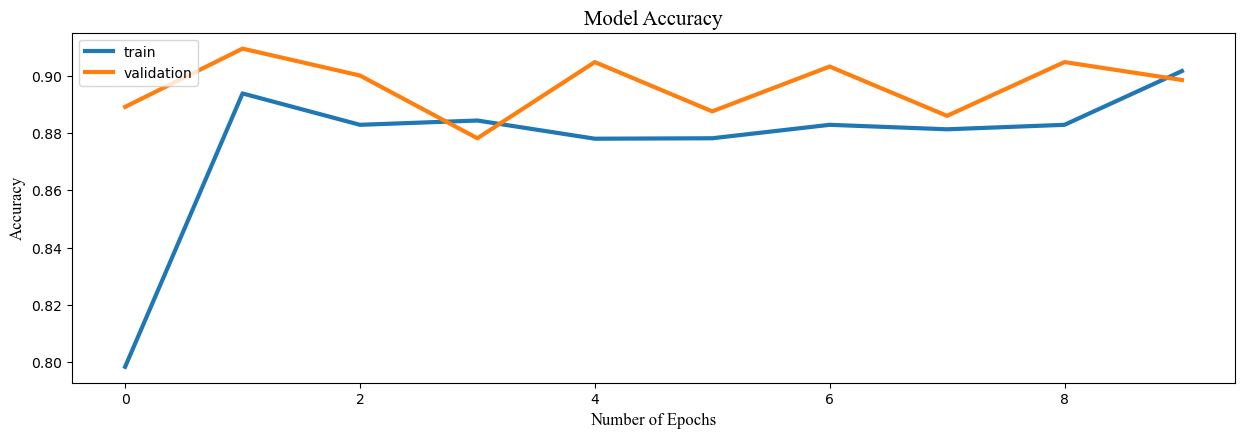

In [86]:
#plotting the loss function and accuracy for different epochs

plt.figure(1, figsize = (15, 10))  
plt.subplot(211)   
plt.plot(r.history['accuracy'], linewidth=3)  
plt.plot(r.history['val_accuracy'], linewidth=3)
plt.title('Model Accuracy',fontname='Times New Roman', fontsize = 15)
plt.ylabel('Accuracy',fontname='Times New Roman', fontsize = 12)
plt.xlabel('Number of Epochs',fontname='Times New Roman', fontsize = 12)
plt.legend(['train', 'validation'], loc='upper left')  



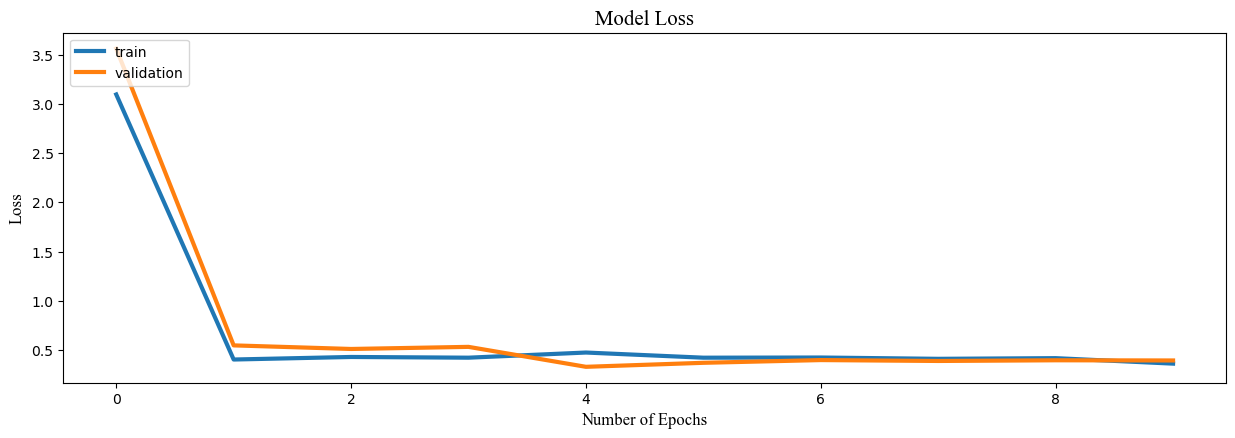

In [87]:
# plotting model loss 
plt.figure(1, figsize = (15, 10))
plt.subplot(212)  
plt.plot(r.history['loss'], linewidth=3)  
plt.plot(r.history['val_loss'], linewidth=3)  
plt.title('Model Loss',fontname='Times New Roman', fontsize = 15)  
plt.ylabel('Loss',fontname='Times New Roman', fontsize = 12)  
plt.xlabel('Number of Epochs',fontname='Times New Roman', fontsize = 12)  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show()

In [ ]:
# !pip install pydot graphviz


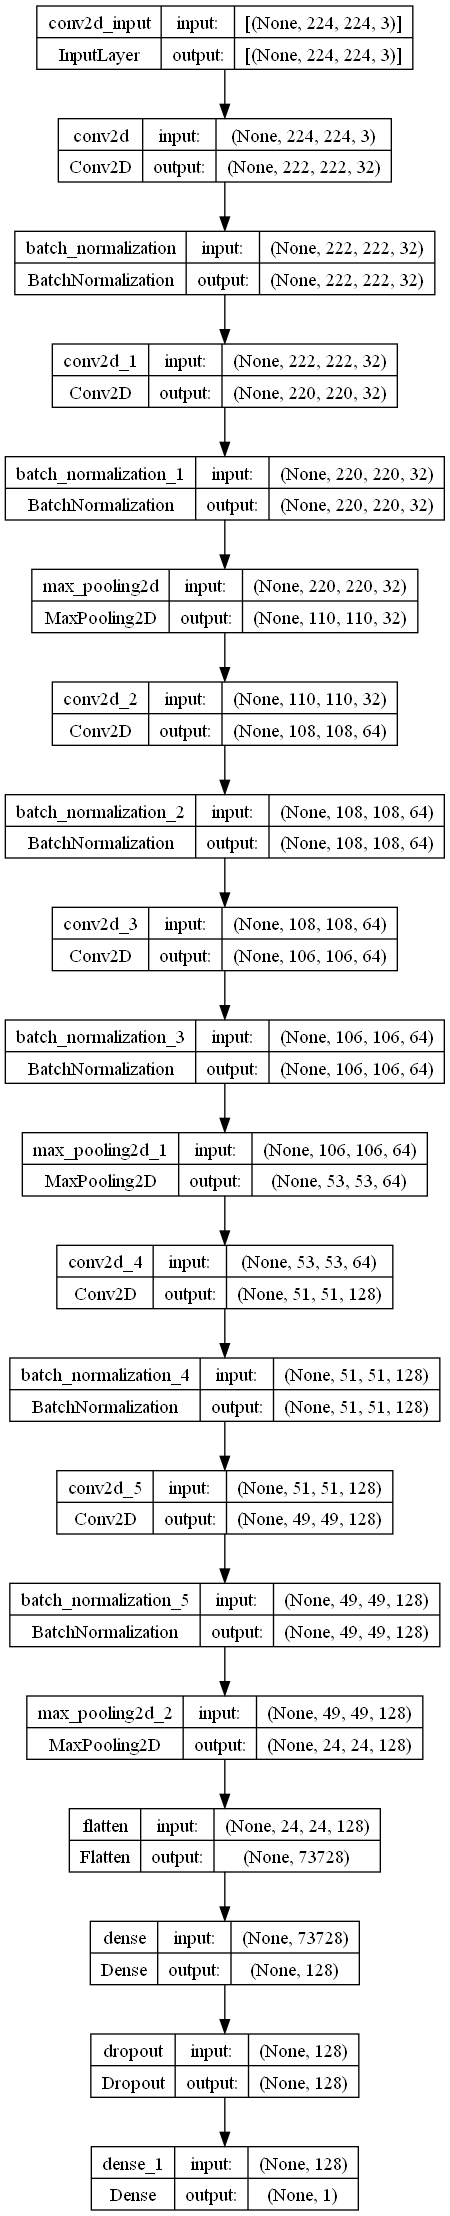

In [37]:
plot_model(cnn_model, to_file='cnn_model_plot.png', show_shapes=True, show_layer_names=True)
# Show the plot here

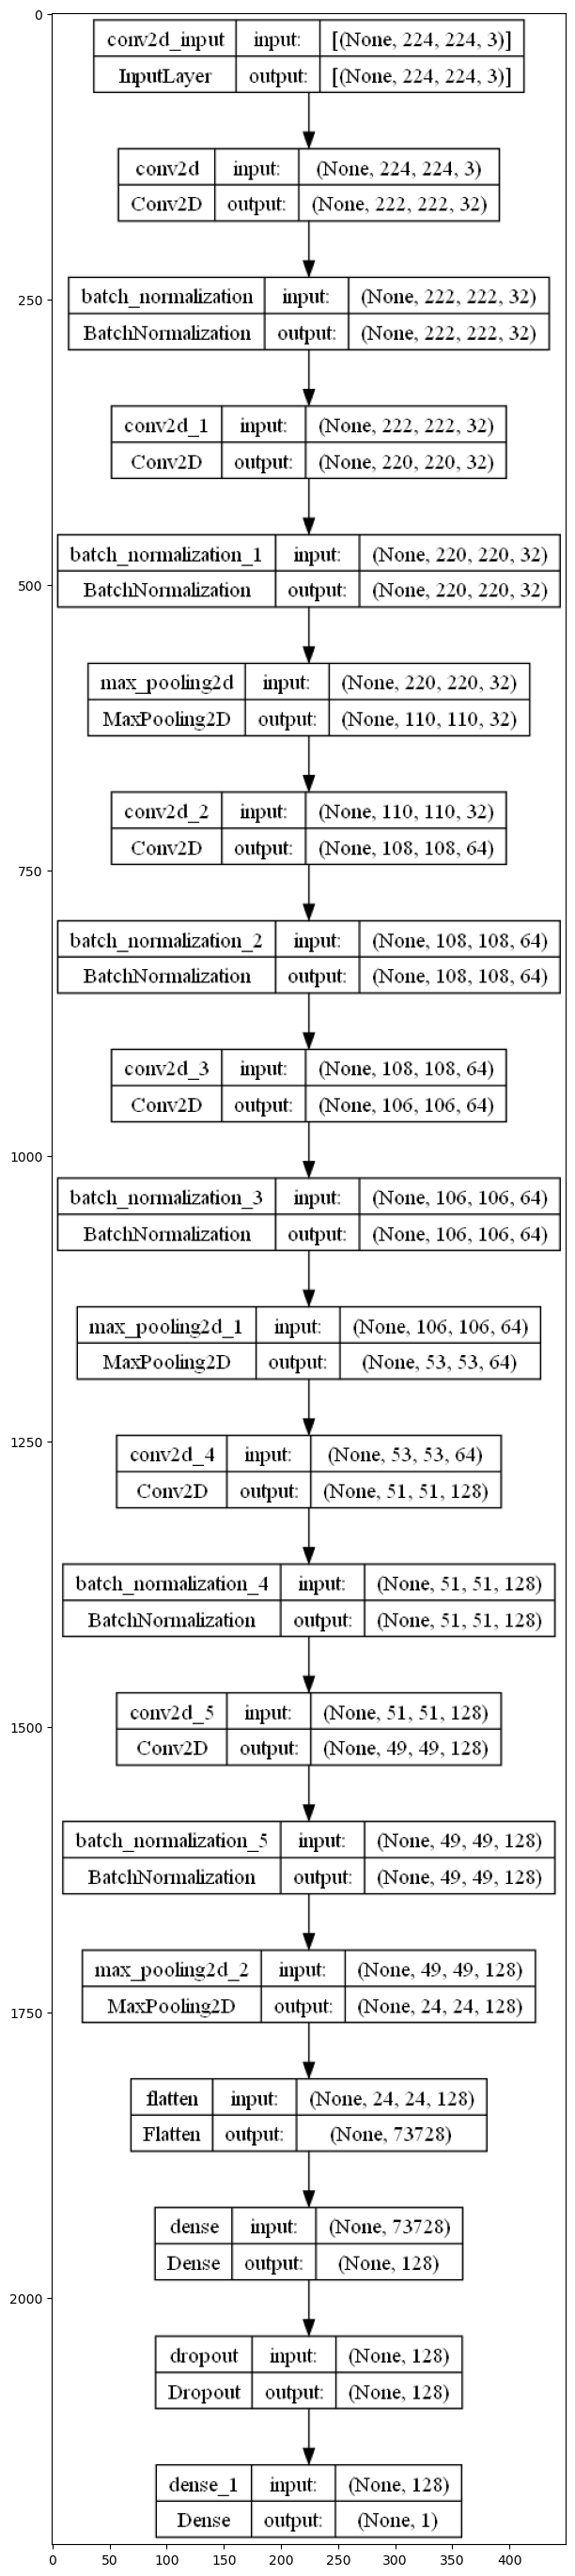

In [38]:
img = plt.imread('cnn_model_plot.png')
plt.figure(figsize=(30,35))
imgplot = plt.imshow(img) 

In [39]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
 ### prediction and performance assessment
test_generator.reset()
pred=cnn_model.predict_generator(test_generator, steps=STEP_SIZE_TEST)
pred_bool = (pred >= 0.5)

y_pred_cnn = np.array(pred_bool,dtype =int)
y_true = np.array(dv[['Pneumonia']])

In [40]:
# print(classification_report(dte[['Pneumonia']], y_pred))
print(classification_report(dtr[['Pneumonia']],y_pred_cnn))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      2667
         1.0       0.00      0.00      0.00       332

    accuracy                           0.89      2999
   macro avg       0.44      0.50      0.47      2999
weighted avg       0.79      0.89      0.84      2999



In [41]:
print(confusion_matrix(dtr[['Pneumonia']],y_pred_cnn))

[[2667    0]
 [ 332    0]]


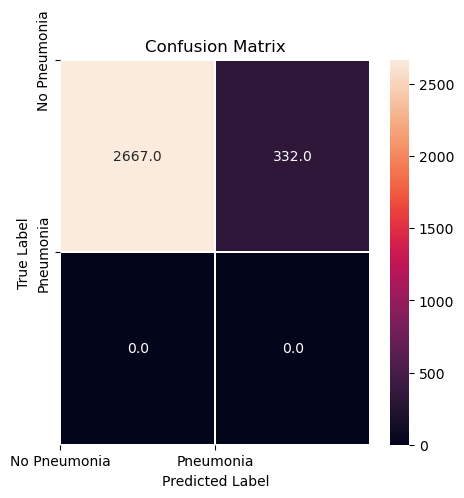

In [42]:
confusion_mtx = confusion_matrix(y_pred_cnn, dtr[['Pneumonia']])
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(confusion_mtx, annot=True,
            linewidths=0.01,
            linecolor="white",
            fmt='.1f', ax=ax)
sns.color_palette("rocket")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Define patient_labels
patient_labels = ['No Pneumonia', 'Pneumonia']

ax.set_xticks(range(len(patient_labels)))
ax.set_xticklabels(patient_labels)
ax.set_yticks(range(len(patient_labels)))
ax.set_yticklabels(patient_labels)
plt.title("Confusion Matrix")
plt.show()


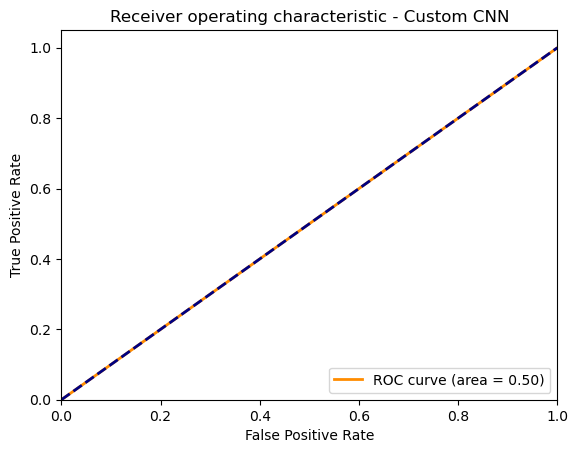

In [43]:
fpr = 0
tpr = 0
roc_auc = 0
fpr, tpr, _ = roc_curve(dtr[['Pneumonia']], y_pred_cnn)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=2,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic - Custom CNN")
plt.legend(loc="lower right")
plt.show()


<h1 style="font-size: 30px;">VGG - 16</h1>

<keras.src.engine.input_layer.InputLayer object at 0x00000199B939A5E0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x00000199B9528F40> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x00000199B95289D0> False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x00000199B946A3D0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x00000199B9517220> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x00000199B9456580> False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x00000199B953A8E0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x00000199B90B3940> True
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x00000199B953F9A0> True
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x00000199B958E280> True
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x00000199B95888E0> True
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x00000199A1B7D8E0> True
<kera

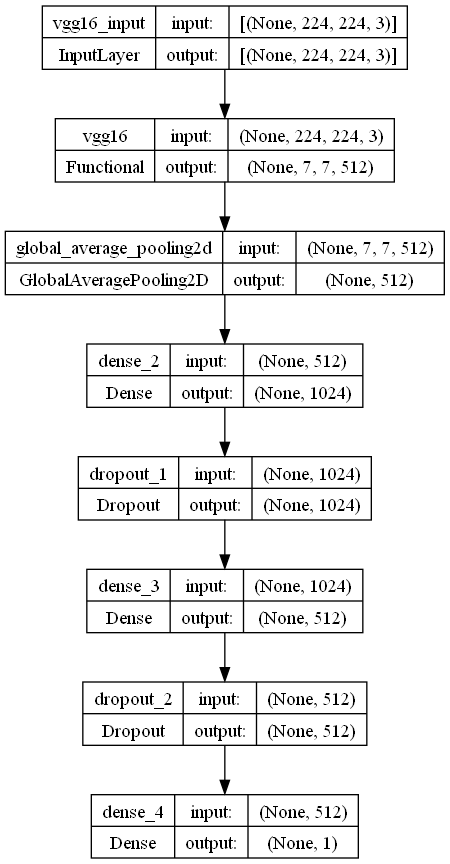

In [44]:
base_model = VGG16(include_top=False,input_shape = (224,224,3),weights = 'imagenet')

for layer in base_model.layers[:-12]:
    layer.trainable = False
    
for layer in base_model.layers:
    print(layer,layer.trainable)

vgg_model = Sequential()
vgg_model.add(base_model)
vgg_model.add(GlobalAveragePooling2D())
vgg_model.add(Dense(1024,activation='relu'))
vgg_model.add(Dropout(0.5))
vgg_model.add(Dense(512,activation='relu'))
vgg_model.add(Dropout(0.5))
vgg_model.add(Dense(1,activation='sigmoid'))
vgg_model.summary()

plot_model(vgg_model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

In [45]:
opt = SGD(lr=1e-4,momentum=0.95)
vgg_model.compile(
    loss='binary_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)   
v = vgg_model.fit_generator(
                    train_generator, 
                    steps_per_epoch  = 20, 
                    validation_data  = valid_generator,
                    validation_steps = 20,
                    epochs           = 10, 
                    verbose          = 1)

Epoch 1/10
20/20 [==============================] - 365s 19s/step - loss: 0.4445 - accuracy: 0.8484 - val_loss: 0.3454 - val_accuracy: 0.8984
Epoch 2/10
20/20 [==============================] - 372s 19s/step - loss: 0.3776 - accuracy: 0.8938 - val_loss: 0.3599 - val_accuracy: 0.8859
Epoch 3/10
20/20 [==============================] - 377s 19s/step - loss: 0.3755 - accuracy: 0.8813 - val_loss: 0.3334 - val_accuracy: 0.9031
Epoch 4/10
20/20 [==============================] - 405s 21s/step - loss: 0.4051 - accuracy: 0.8703 - val_loss: 0.3490 - val_accuracy: 0.9000
Epoch 5/10
20/20 [==============================] - 409s 21s/step - loss: 0.3180 - accuracy: 0.9062 - val_loss: 0.3737 - val_accuracy: 0.8766
Epoch 6/10
20/20 [==============================] - 408s 21s/step - loss: 0.3067 - accuracy: 0.9125 - val_loss: 0.3475 - val_accuracy: 0.8922
Epoch 7/10
20/20 [==============================] - 408s 21s/step - loss: 0.3519 - accuracy: 0.8922 - val_loss: 0.3049 - val_accuracy: 0.9094
Epoch 

In [46]:
print("results")
result_vgg  = vgg_model.evaluate_generator(test_generator, steps=len(test_generator), verbose=1)

print("%s%.2f  "% ("Loss     : ", result_vgg[0]))
print("%s%.2f%s"% ("Accuracy : ", result_vgg[1]*100, "%"))

results
2999/2999 [==============================] - 765s 255ms/step - loss: 0.3454 - accuracy: 0.8906
Loss     : 0.35  
Accuracy : 89.06%


In [47]:
# Accessing the training and validation metrics from the history object
train_loss_vgg = v.history['loss']
train_accuracy_vgg = v.history['accuracy']

validation_loss_vgg = v.history['val_loss']
validation_accuracy_vgg = v.history['val_accuracy']

test_loss_vgg = result_vgg[0]
test_accuracy_vgg = result_vgg[1]

# Print or plot the training and validation metrics
print("Training Loss: {:.4f}".format(train_loss_vgg[-1]))
print("Training Accuracy: {:.4f}%".format(train_accuracy_vgg[-1] * 100))

print("Validation Loss: {:.4f}".format(validation_loss_vgg[-1]))
print("Validation Accuracy: {:.4f}%".format(validation_accuracy_vgg[-1] * 100))

print("Test Loss: {:.4f}".format(test_loss_vgg))
print("Test Accuracy: {:.4f}%".format(test_accuracy_vgg*100))



Training Loss: 0.3587
Training Accuracy: 89.5312%
Validation Loss: 0.3583
Validation Accuracy: 88.4375%
Test Loss: 0.3454
Test Accuracy: 89.0630%


In [48]:
data_vgg = {
    'loss': pd.Series(v.history['loss']),
    'accuracy': pd.Series(v.history['accuracy']),
    'val_loss': pd.Series(v.history['val_loss']),
    'val_accuracy': pd.Series(v.history['val_accuracy'])
}
df_vgg = pd.DataFrame(data_vgg)

In [49]:
df_vgg.index.name = 'epoch'
df_vgg.index = range(1, 11)
df_vgg

loss  accuracy  val_loss  val_accuracy
1   0.444523  0.848437  0.345403      0.898438
2   0.377605  0.893750  0.359858      0.885938
3   0.375459  0.881250  0.333385      0.903125
4   0.405082  0.870313  0.348960      0.900000
5   0.317973  0.906250  0.373655      0.876562
6   0.306651  0.912500  0.347511      0.892187
7   0.351931  0.892187  0.304908      0.909375
8   0.345199  0.898438  0.330249      0.901563
9   0.394489  0.875000  0.355297      0.887500
10  0.358710  0.895312  0.358253      0.884375

In [50]:
min_val_loss_row = df_vgg.loc[df_vgg['val_loss'].idxmin()]
loss_vgg = min_val_loss_row['loss']
accuracy_vgg = min_val_loss_row['accuracy']
val_loss_vgg = min_val_loss_row['val_loss']
val_acc_vgg = min_val_loss_row['val_accuracy']

print("loss_vgg: {:.4f}".format(loss_vgg))
print("accuracy_vgg: {:.4f}%".format(accuracy_vgg * 100))
print("val_loss_vgg: {:.4f}".format(val_loss_vgg))
print("val_accuracy_vgg: {:.4f}%".format(val_acc_vgg * 100))

loss_vgg: 0.3519
accuracy_vgg: 89.2187%
val_loss_vgg: 0.3049
val_accuracy_vgg: 90.9375%


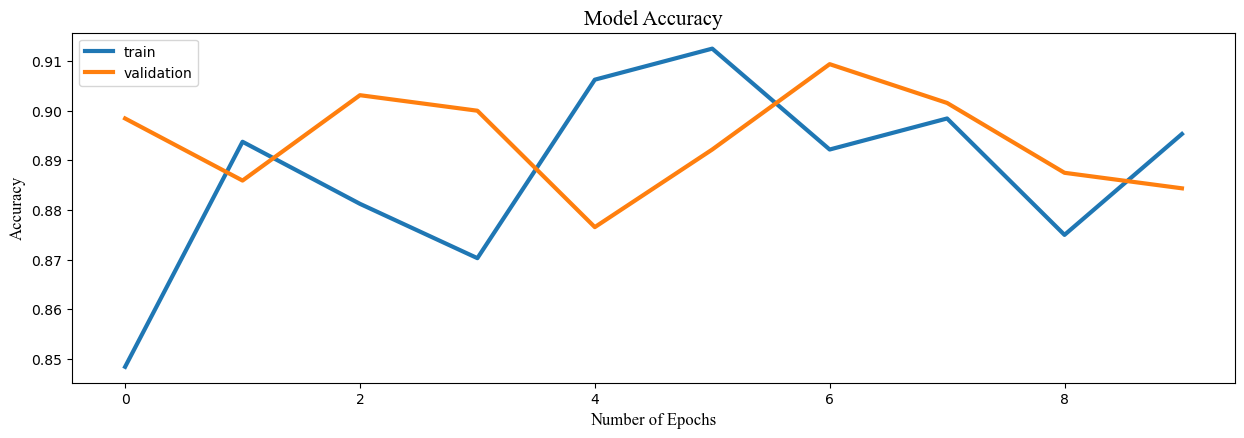

In [91]:
#plotting the loss function and accuracy for different epochs

plt.figure(1, figsize = (15, 10))  
plt.subplot(211)  
plt.plot(v.history['accuracy'], linewidth=3)  
plt.plot(v.history['val_accuracy'], linewidth=3)  
plt.title('Model Accuracy',fontname='Times New Roman', fontsize = 15)  
plt.ylabel('Accuracy',fontname='Times New Roman', fontsize = 12)  
plt.xlabel('Number of Epochs',fontname='Times New Roman', fontsize = 12)  
plt.legend(['train', 'validation'], loc='upper left')   

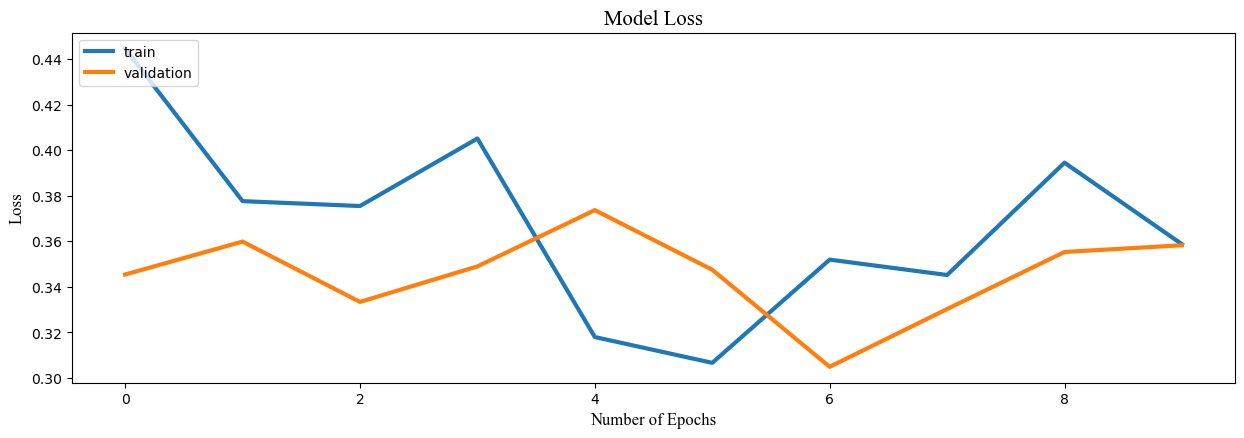

In [90]:
# plotting model loss 
plt.figure(1, figsize = (15, 10))
plt.subplot(212)  
plt.plot(v.history['loss'], linewidth=3)  
plt.plot(v.history['val_loss'], linewidth=3)  
plt.title('Model Loss',fontname='Times New Roman', fontsize = 15)  
plt.ylabel('Loss',fontname='Times New Roman', fontsize = 12)  
plt.xlabel('Number of Epochs',fontname='Times New Roman', fontsize = 12)  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show()

In [53]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
### prediction and performance assessment
test_generator.reset()
pred=vgg_model.predict_generator(test_generator, steps=STEP_SIZE_TEST)
pred_bool = (pred >= 0.5)

y_pred_vgg = np.array(pred_bool,dtype =int)
y_true = np.array(dte[['Pneumonia']])
print(classification_report(y_true, y_pred_vgg))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      2671
         1.0       0.00      0.00      0.00       328

    accuracy                           0.89      2999
   macro avg       0.45      0.50      0.47      2999
weighted avg       0.79      0.89      0.84      2999



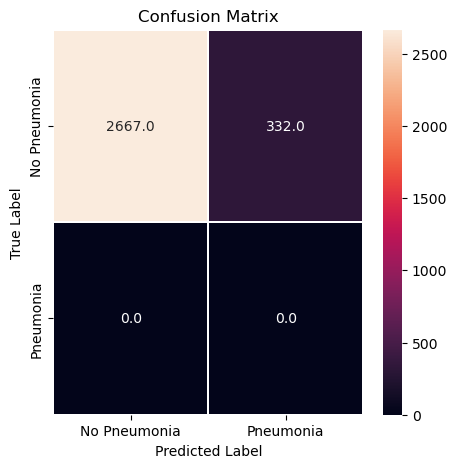

In [54]:
confusion_mtx = confusion_matrix(y_pred_vgg, dtr[['Pneumonia']])
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(confusion_mtx, annot=True, 
            linewidths=0.01,
            linecolor="white", 
            fmt='.1f', ax=ax)
sns.color_palette("rocket")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Define patient_labels
patient_labels = ['No Pneumonia', 'Pneumonia']

# Use set_xticklabels and set_yticklabels
ax.set_xticklabels(patient_labels)
ax.set_yticklabels(patient_labels)
plt.title("Confusion Matrix")
plt.show()


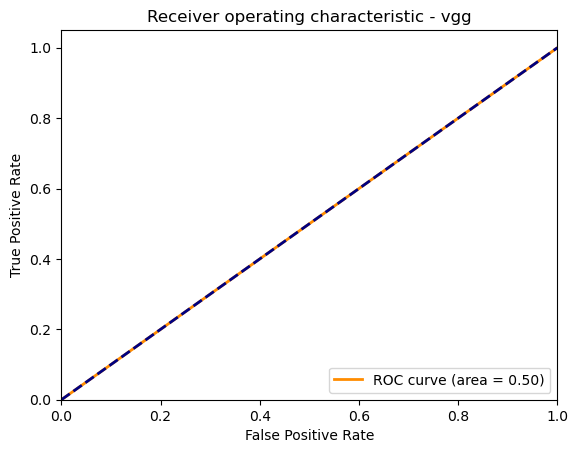

In [55]:
fpr = 0
tpr = 0
roc_auc = 0
fpr, tpr, _ = roc_curve(dtr[['Pneumonia']], y_pred_vgg)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=2,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic - vgg")
plt.legend(loc="lower right")
plt.show()


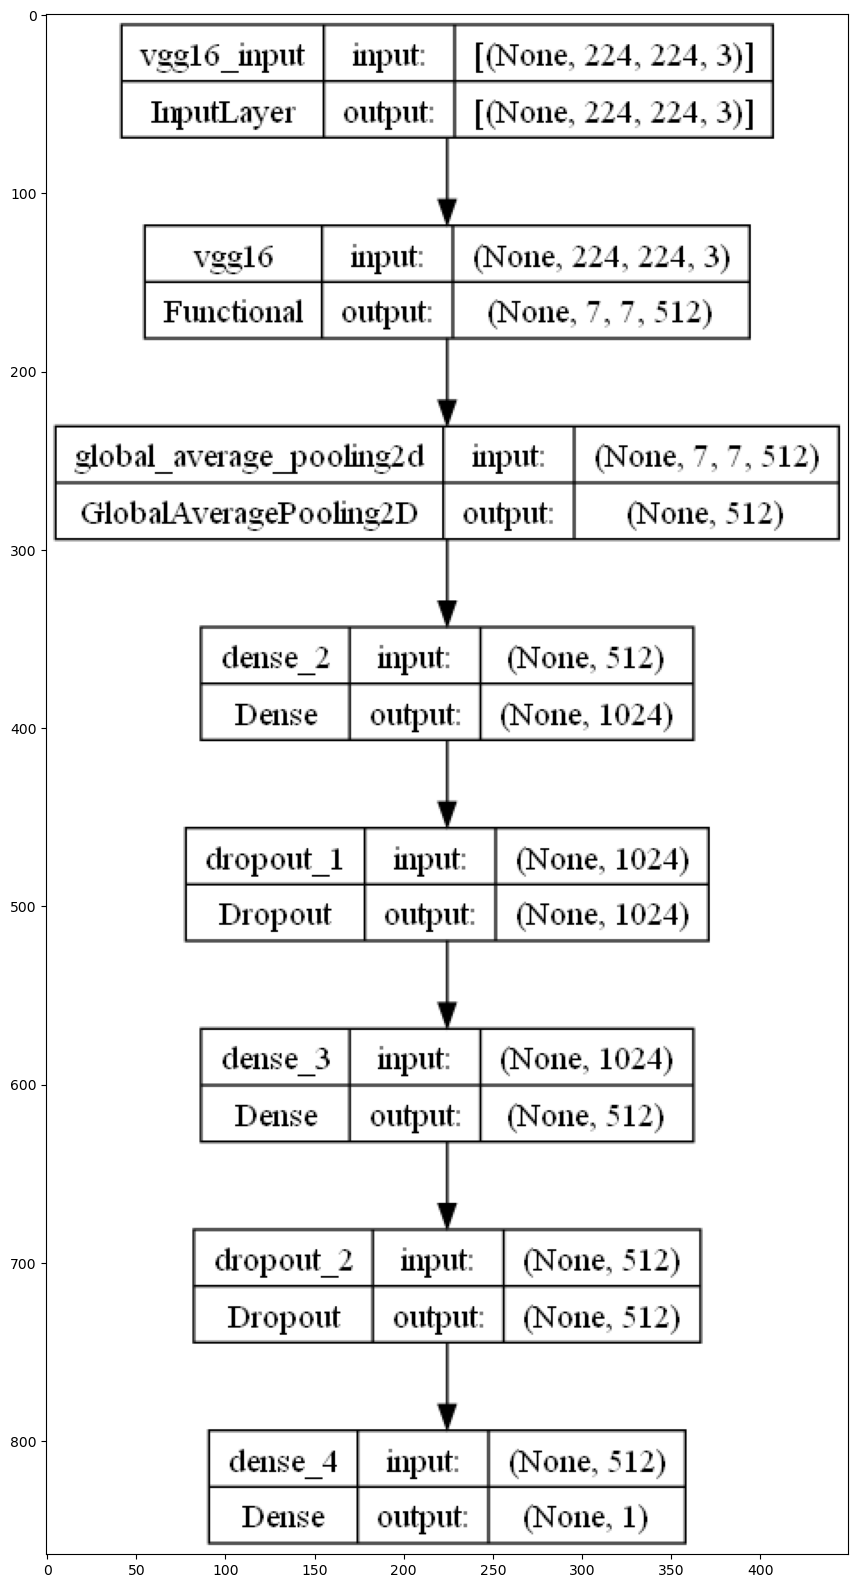

In [56]:
# Generate the plot
plot_model(vgg_model, to_file = 'vgg16_model_plot.png',
           show_shapes = True,
           show_layer_names = True)

# Show the plot here
img = plt.imread('vgg16_model_plot.png')
plt.figure(figsize=(30,20))
imgplot = plt.imshow(img) 

<h1 style="font-size: 30px;">AlexNet</h1>

In [57]:
#Using Alexnet architecture. input is 224, 224,3 image
alexnet_model = tf.keras.models.Sequential([
    #1st Convolutional Layer
    tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    #2nd Convolutional Layer
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    #3rd Convolutional Layer
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    #4th Convolutional Layer
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    #5th Convolutional Layer
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    #Passing it to a Fully Connected layer
    tf.keras.layers.Flatten(),
    # 1st Fully Connected Layer
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),# Add Dropout to prevent overfitting
    # 2nd Fully Connected Layer
    tf.keras.layers.Dense(4096, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(0.5),
    # 3rd Fully Connected Layer
    tf.keras.layers.Dense(1000, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(0.5),
    #Output Layer
    tf.keras.layers.Dense(1, activation='sigmoid'),
    #tf.keras.layers.BatchNormalization()
])

In [58]:
alexnet_model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [59]:
#Getting model's summary
alexnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization_6 (Bat  (None, 54, 54, 96)        384       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 26, 26, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 batch_normalization_7 (Bat  (None, 26, 26, 256)       1024      
 chNormalization)                                                
                                                      

In [60]:
 alex = alexnet_model.fit_generator(
                    train_generator, 
                    steps_per_epoch  = 20, 
                    validation_data  = valid_generator,
                    validation_steps = 20,
                    epochs           = 10, 
                    verbose          = 1)

Epoch 1/10
20/20 [==============================] - 40s 2s/step - loss: 2.0735 - accuracy: 0.7859 - val_loss: 244.1734 - val_accuracy: 0.9031
Epoch 2/10
20/20 [==============================] - 34s 2s/step - loss: 0.5030 - accuracy: 0.8859 - val_loss: 8.5509 - val_accuracy: 0.9000
Epoch 3/10
20/20 [==============================] - 34s 2s/step - loss: 0.4199 - accuracy: 0.8672 - val_loss: 3.6869 - val_accuracy: 0.8859
Epoch 4/10
20/20 [==============================] - 34s 2s/step - loss: 0.3541 - accuracy: 0.8859 - val_loss: 1.5392 - val_accuracy: 0.9187
Epoch 5/10
20/20 [==============================] - 34s 2s/step - loss: 0.3262 - accuracy: 0.9047 - val_loss: 1.0740 - val_accuracy: 0.8938
Epoch 6/10
20/20 [==============================] - 34s 2s/step - loss: 0.3649 - accuracy: 0.8922 - val_loss: 0.3762 - val_accuracy: 0.8844
Epoch 7/10
20/20 [==============================] - 34s 2s/step - loss: 0.3272 - accuracy: 0.9065 - val_loss: 0.3850 - val_accuracy: 0.8813
Epoch 8/10
20/20 [

In [61]:
print("results")
result_alex  = alexnet_model.evaluate_generator(test_generator, steps=len(test_generator), verbose=1)

print("%s%.2f  "% ("Loss     : ", result_alex[0]))
print("%s%.2f%s"% ("Accuracy : ", result_alex[1]*100, "%"))

results
2999/2999 [==============================] - 110s 37ms/step - loss: 0.3918 - accuracy: 0.8906
Loss     : 0.39  
Accuracy : 89.06%


In [62]:
# Accessing the training and validation metrics from the history object
train_loss_alex = alex.history['loss']
train_accuracy_alex = alex.history['accuracy']

validation_loss_alex = alex.history['val_loss']
validation_accuracy_alex = alex.history['val_accuracy']

test_loss_alex = result_alex[0]
test_accuracy_alex = result_alex[1]

# Print or plot the training and validation metrics
print("Training Loss: {:.4f}".format(train_loss_alex[-1]))
print("Training Accuracy: {:.4f}%".format(train_accuracy_alex[-1] * 100))

print("Validation Loss: {:.4f}".format(validation_loss_alex[-1]))
print("Validation Accuracy: {:.4f}%".format(validation_accuracy_alex[-1] * 100))

print("Test Loss: {:.4f}".format(test_loss_alex))
print("Test Accuracy: {:.4f}%".format(test_accuracy_alex*100))


Training Loss: 0.3577
Training Accuracy: 87.7971%
Validation Loss: 0.3715
Validation Accuracy: 90.3125%
Test Loss: 0.3918
Test Accuracy: 89.0630%


In [63]:
data_alex = {
    'loss': pd.Series(alex.history['loss']),
    'accuracy': pd.Series(alex.history['accuracy']),
    'val_loss': pd.Series(alex.history['val_loss']),
    'val_accuracy': pd.Series(alex.history['val_accuracy'])
}
df_alex = pd.DataFrame(data_alex)

In [64]:
df_alex.index.name = 'epoch'
df_alex.index = range(1, 11)
df_alex

loss  accuracy    val_loss  val_accuracy
1   2.073477  0.785937  244.173386      0.903125
2   0.502952  0.885938    8.550916      0.900000
3   0.419874  0.867188    3.686879      0.885938
4   0.354081  0.885938    1.539178      0.918750
5   0.326156  0.904688    1.073951      0.893750
6   0.364854  0.892187    0.376154      0.884375
7   0.327171  0.906498    0.384969      0.881250
8   0.366821  0.890650    0.343978      0.895312
9   0.384878  0.876387    0.417276      0.892187
10  0.357742  0.877971    0.371511      0.903125

In [65]:
min_val_loss_row = df_alex.loc[df_alex['val_loss'].idxmin()]
loss_alex = min_val_loss_row['loss']
accuracy_alex = min_val_loss_row['accuracy']
val_loss_alex = min_val_loss_row['val_loss']
val_acc_alex = min_val_loss_row['val_accuracy']

print("loss_alex: {:.4f}".format(loss_alex))
print("accuracy_alex: {:.4f}%".format(accuracy_alex * 100))
print("val_loss_alex: {:.4f}".format(val_loss_alex))
print("val_accuracy_alex: {:.4f}%".format(val_acc_alex * 100))

loss_alex: 0.3668
accuracy_alex: 89.0650%
val_loss_alex: 0.3440
val_accuracy_alex: 89.5312%


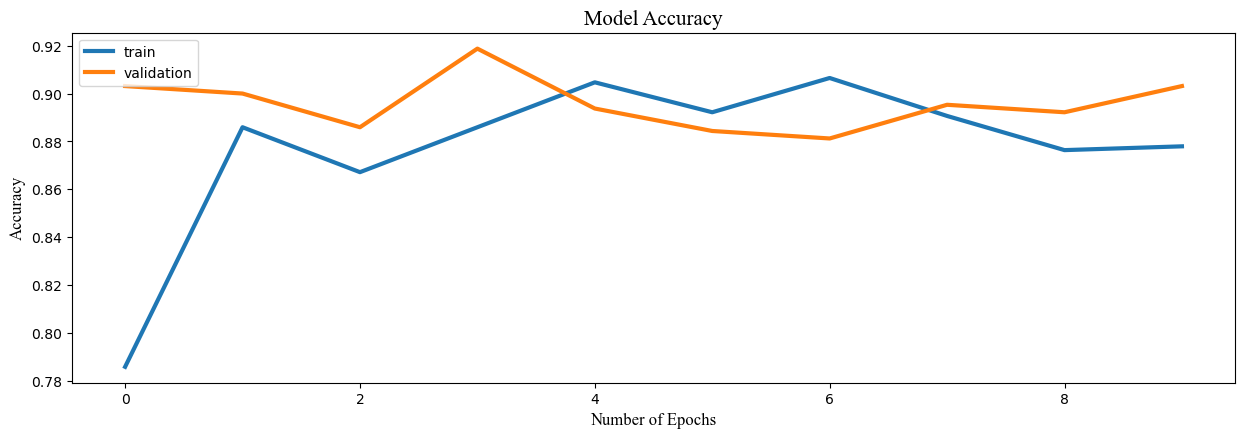

In [94]:
#plotting the loss function and accuracy for different epochs

plt.figure(1, figsize = (15, 10))  
plt.subplot(211)  
plt.plot(alex.history['accuracy'], linewidth=3)  
plt.plot(alex.history['val_accuracy'], linewidth=3)  
plt.title('Model Accuracy',fontname='Times New Roman', fontsize = 15)  
plt.ylabel('Accuracy',fontname='Times New Roman', fontsize = 12)  
plt.xlabel('Number of Epochs',fontname='Times New Roman', fontsize = 12)  
plt.legend(['train', 'validation'], loc='upper left')   


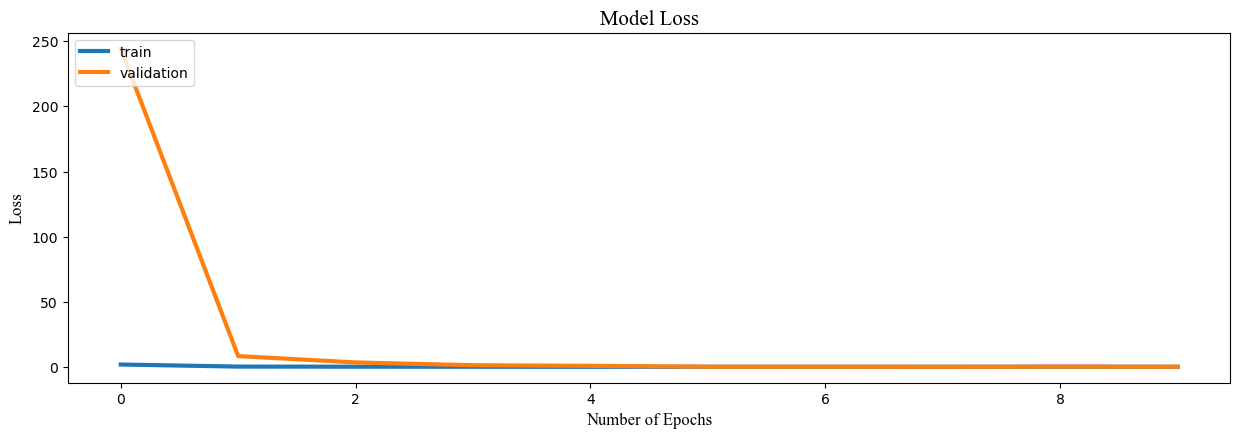

In [95]:
# plotting model loss 
plt.figure(1, figsize = (15, 10))
plt.subplot(212)  
plt.plot(alex.history['loss'], linewidth=3)  
plt.plot(alex.history['val_loss'], linewidth=3)  
plt.title('Model Loss',fontname='Times New Roman', fontsize = 15)  
plt.ylabel('Loss',fontname='Times New Roman', fontsize = 12)  
plt.xlabel('Number of Epochs',fontname='Times New Roman', fontsize = 12)  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show()

In [68]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
### prediction and performance assessment
test_generator.reset()
pred=alexnet_model.predict_generator(test_generator, steps=STEP_SIZE_TEST)
pred_bool = (pred >= 0.5)

y_pred_alex = np.array(pred_bool,dtype =int)
y_true = np.array(dtr[['Pneumonia']])
print(classification_report(y_true, y_pred_alex))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      2667
         1.0       0.00      0.00      0.00       332

    accuracy                           0.89      2999
   macro avg       0.44      0.50      0.47      2999
weighted avg       0.79      0.89      0.84      2999



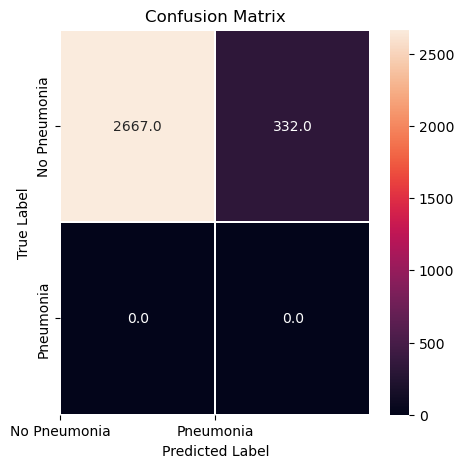

In [69]:
confusion_mtx = confusion_matrix(y_pred_alex, dtr[['Pneumonia']])
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(confusion_mtx, annot=True, 
            linewidths=0.01,
            linecolor="white", 
            fmt='.1f', ax=ax,)
sns.color_palette("rocket")

# Set tick locations and labels for x-axis
ax.set_xticks([0, 1])
ax.set_xticklabels(['No Pneumonia', 'Pneumonia'])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Set tick labels for y-axis
patient_labels = ['No Pneumonia', 'Pneumonia']
ax.set_yticklabels(patient_labels)

plt.title("Confusion Matrix")
plt.show()


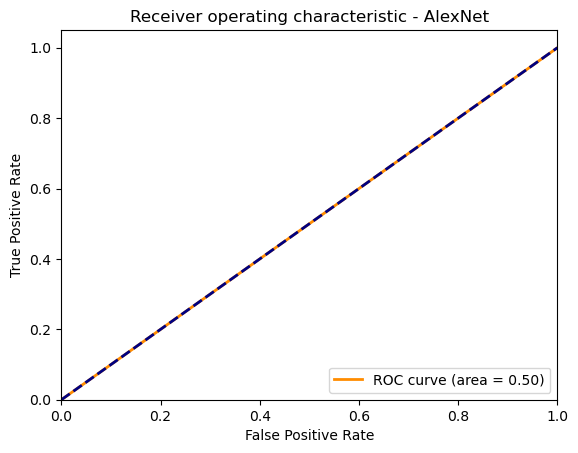

In [70]:
fpr = 0
tpr = 0
roc_auc = 0
fpr, tpr, _ = roc_curve(dtr[['Pneumonia']], y_pred_alex)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=2,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic - AlexNet")
plt.legend(loc="lower right")
plt.show()

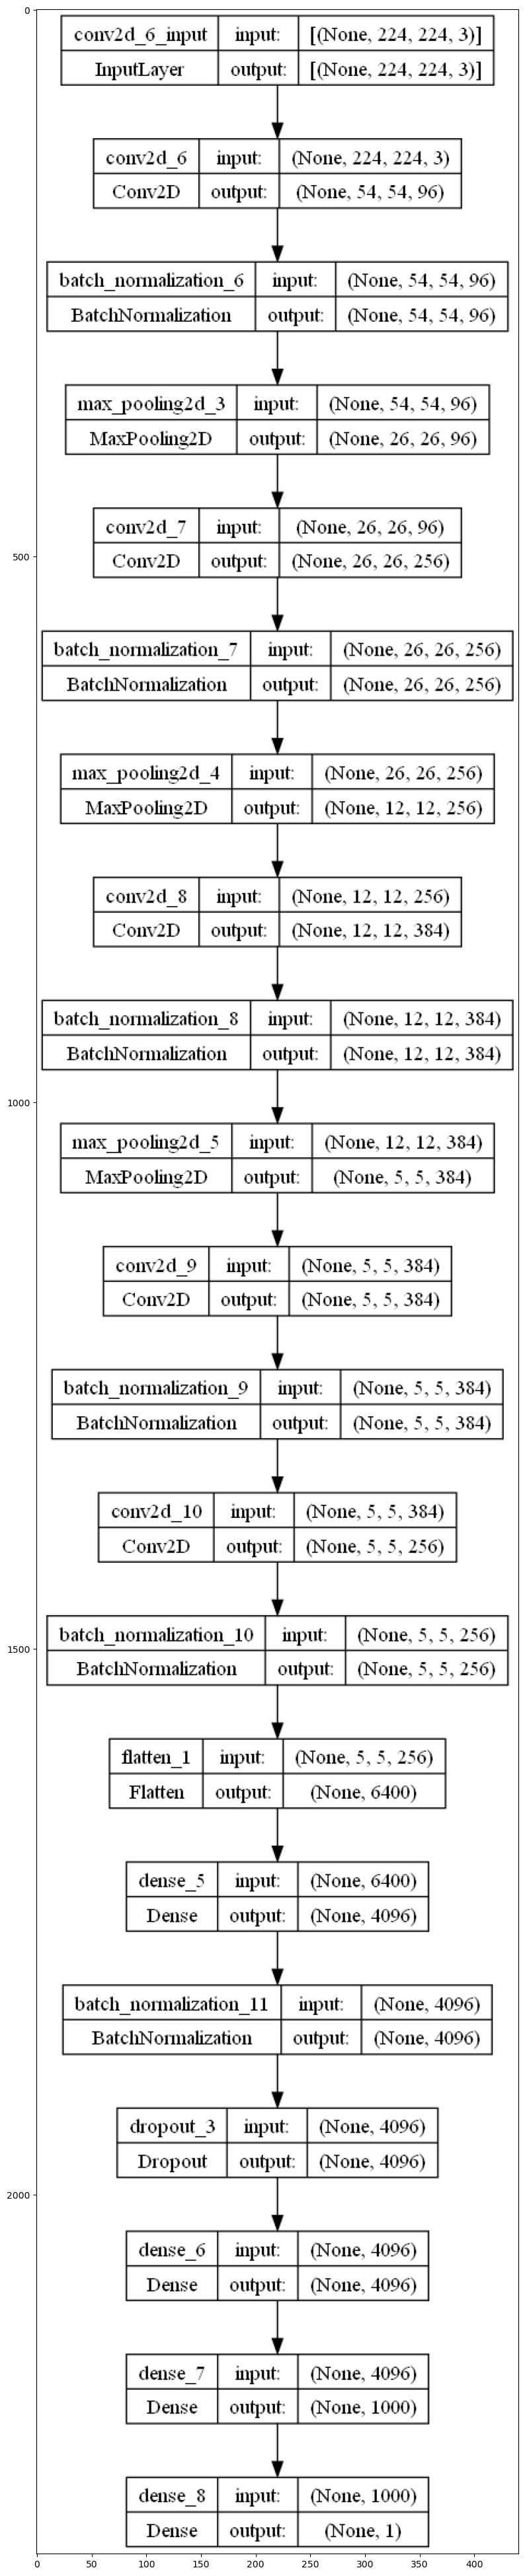

In [71]:
# Generate the plot
plot_model(alexnet_model, to_file = 'alexnet_model_plot.png',
           show_shapes = True,
           show_layer_names = True)

# Show the plot here
img = plt.imread('alexnet_model_plot.png')
plt.figure(figsize=(50,50))
imgplot = plt.imshow(img) 

<h1 style="font-size: 30px;">Conclusion</h1>

In [72]:
data = [['CNN', loss_ccnn, accuracy_ccnn, val_loss_ccnn, val_acc_ccnn], ['VGG', loss_vgg, accuracy_vgg, val_loss_vgg, val_acc_vgg], ['AlexNet', loss_alex, accuracy_alex, val_loss_alex, val_acc_alex]]
df_result = pd.DataFrame(data, columns=['model', 'loss', 'acc', 'val_loss', 'val_acc'])

In [73]:
import plotly.express as px
import pandas as pd

# Assuming df_result is your DataFrame with columns 'model', 'loss', and 'acc'
# If not, replace it with your actual DataFrame

# Melt the DataFrame
df_melted = df_result.melt(id_vars='model')

# Round the 'value' column to 2 digits after the decimal point
df_melted['value'] = df_melted['value'].round(2)

# Create the plot
fig = px.bar(df_melted, x='model', y='value', color='variable',
             labels={'value': 'Metrics'},
             title='Respective Models and their training and validation accuracy',
             text='value', height=500)

# Customize the layout
fig.update_layout(xaxis_title='Model', yaxis_title='Metrics', title_text='Respective Models and their training and validation accuracy',
                  xaxis=dict(tickangle=0),
                  yaxis=dict(title_text='Metrics'),
                  barmode='group',  # Set the barmode to 'group' for side-by-side bars
                  plot_bgcolor='white',  # Set the background color to white
                  paper_bgcolor='white',  # Set the paper color to white
                  font=dict(color='black'),  # Set the font color to black
                  uniformtext_minsize=8,  # Set the minimum size for uniform text
                  uniformtext_mode='hide')  # Hide text if it doesn't fit

# Set the text angle to 0 (horizontal)
fig.update_traces(textangle=0)

# Show the plot
fig.show()
